In [1]:
import os
import numpy as np
import torch
import matplotlib.pyplot as plt
import importlib
import sys
import time

import utils
from models import generators,layers
sys.path.append("models/")



In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")



filename = '../Exps/wall_v2/241_D_patch_dch64_nld4_G_patch2D_gch52_nlg6_npatches3x3_randomcrop192_n_cl1_originalspade_overlappad4_indmaps_overlappadconv_residual_FCG'

checkpoint = torch.load(filename+'/600_250.pth',map_location='cpu')

args = checkpoint['args']
new_state_dict_G = checkpoint['netG_state_dict']   
#args.outer_padding = 'constant'

netG = generators.Res_Generator(args, n_classes =args.n_cl).to(device)

netG.load_state_dict(new_state_dict_G)
_=netG.eval()




In [3]:
args.G_batch_size

8733 4112
Output resolution:  2688 2688


CPU 4.52792


(-0.5, 2687.5, 2687.5, -0.5)

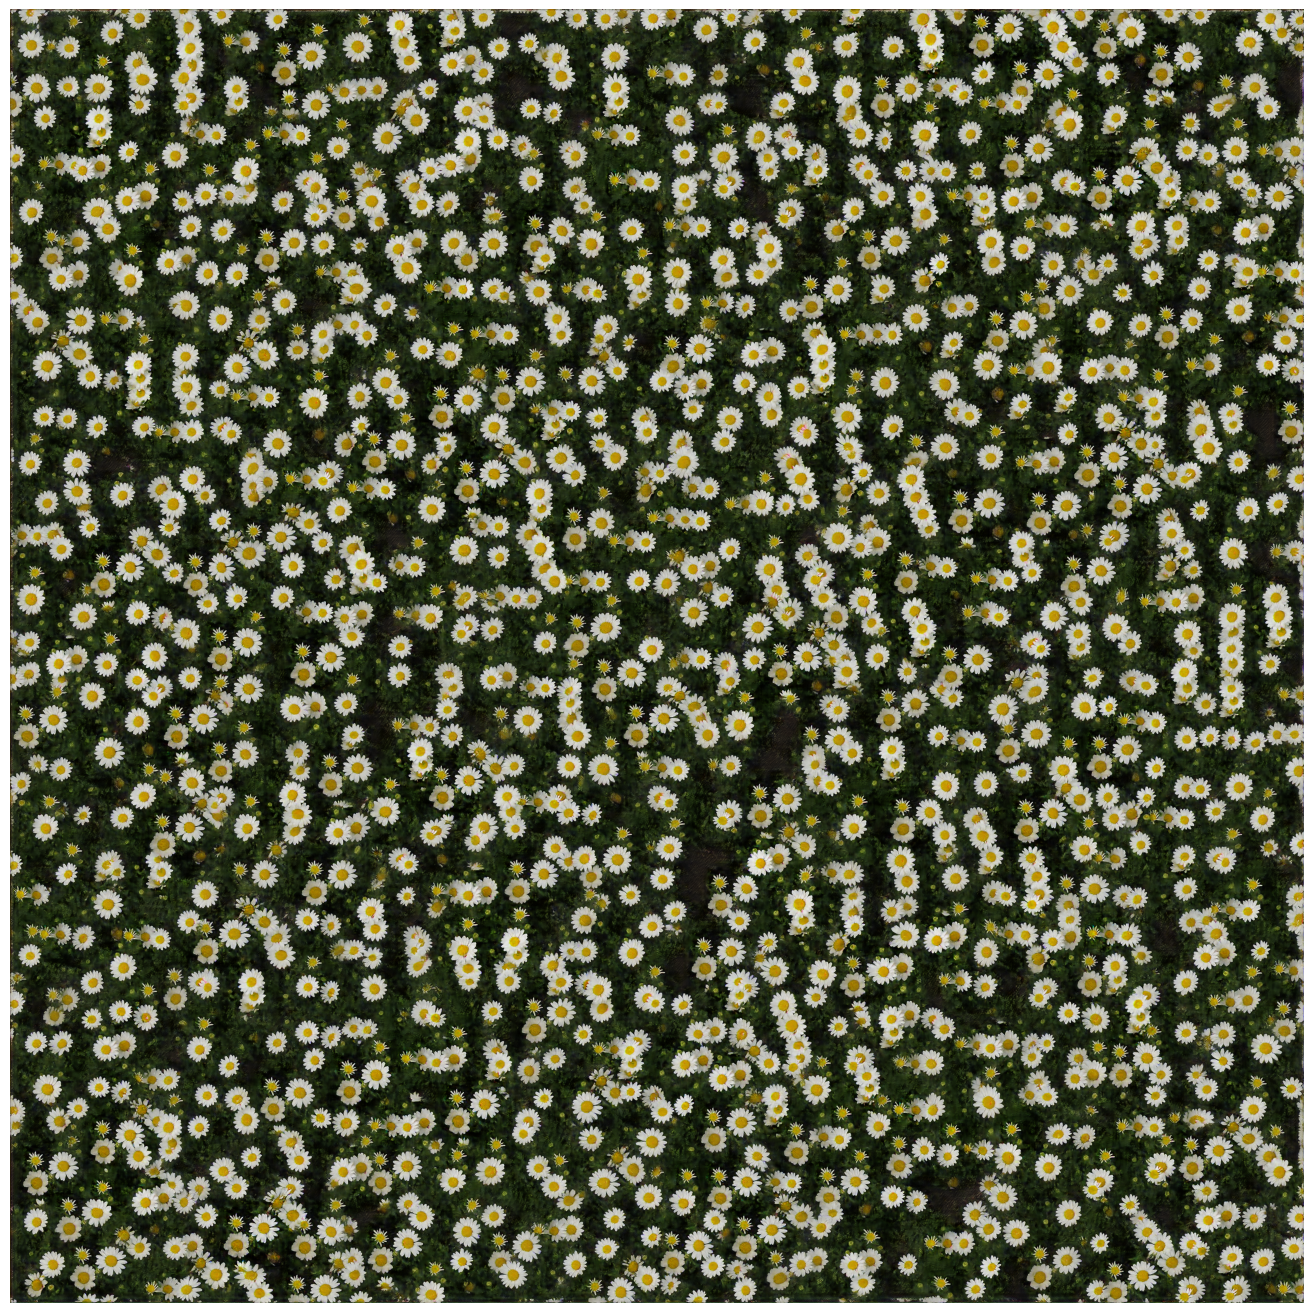

In [4]:

ts = np.random.randint(0,10000)
ns = np.random.randint(0,10000)


print(ts,ns)
torch.manual_seed(ts)
np.random.seed(ns)


# specify the size of the output image by setting the number of patches in both directions
# output resolution = h*gen_res X w*gen_res
h = args.num_patches_h
w = args.num_patches_w
h = 21
w = 21
N = 1
gen_res = (2**(args.n_layers_G-1))*args.base_res
print('Output resolution: ', h*gen_res,w*gen_res)
before = time.time()



with torch.no_grad():
    full_img = utils.scale_2D(args,netG,n_imgs = N,h=h,w=w,device =device)

print(f'CPU {time.time() - before:.5f}') # output: CPU 0.00066

mult = 0.8

#Nx = 1
#Ny = 2
 
 
fig2, axes = plt.subplots(1,1,figsize=(mult*w,mult*h))
im_np = full_img[0].permute(1, 2, 0).numpy()*0.5+0.5
#im_np = np.round(im_np)

plt.imshow(im_np)
axes.axis('off')

#plt.savefig('241_ex.pdf',bbox_inches='tight',pad_inches = 0)